In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import pandas as pd
import numpy as np
import itertools
import subprocess

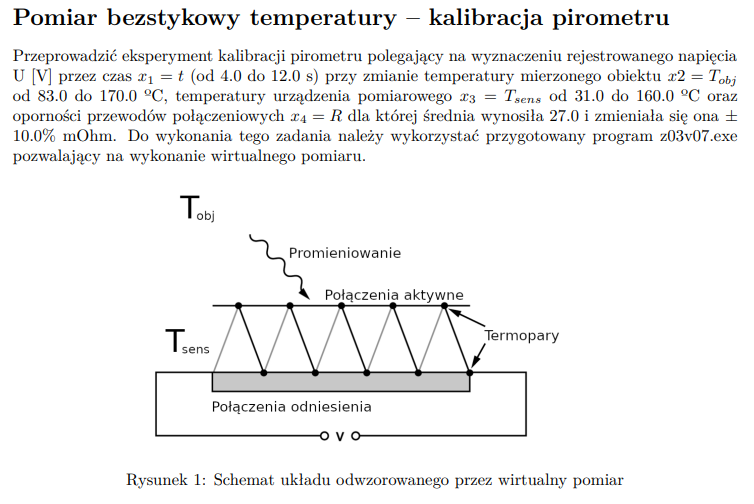

# Start

In [2]:


x1 = np.array([4, 12])
x2 = np.array([83, 170])
x3 = np.array([31, 160])
x4 = np.array([24.3, 29.7])
x = np.array([x1, x2, x3, x4])
y_list = []  # Inicjalizacja listy

for i in itertools.product(*x):
    p = subprocess.run(["z03v07.exe", str(i[0]), str(i[1]), str(i[2]), str(i[3])], capture_output=True, shell=True)
    if p.returncode == 0:
        result = float(p.stdout)
        if i[0] == np.min(x1):
            t1 = 't1-'
        else:
            t1 = 't1+'
        if i[1] == np.min(x2):
            t2 = 't2-'
        else:
            t2 = 't2+'
        if i[2] == np.min(x3):
            t3 = 't3-'
        else:
            t3 = 't3+'
        if i[3] == np.min(x4):
            t4 = 't4-'
        else:
            t4 = 't4+'
        new_value = np.array([t1, t2, t3, t4, result])
        y_list.append(new_value)

y = np.array(y_list)
y[:, 4] = y[:, 4].astype(float)


In [3]:

db = pd.DataFrame(data = y,columns=['t1','t2','t3','t4','Value'])
db.to_excel('dane.xlsx',index=False)

In [16]:
x1 = np.array([8.5])
x2 = np.array([83, 170])
x3 = np.array([31, 160])
x4 = np.array([27])
x = [x1, x2, x3, x4]
y_list = []  # Inicjalizacja listy
y_list_to_matrix = []
for i in itertools.product(*x):
    p = subprocess.run(["z03v07.exe", str(i[0]), str(i[1]), str(i[2]), str(i[3])], capture_output=True, shell=True)
    result = float(p.stdout)
    new_value = np.array([ str(i[1]), str(i[2]),result])
    new_value_to_matrix = new_value = np.array([ str(i[0]), str(i[1]), str(i[2]), str(i[3]),result])
    y_list.append(new_value)
    y_list_to_matrix.append(new_value_to_matrix)


# Create new data to duplex level 
#### x1 it is t2 and x2 it is t3

In [26]:
y_duplex = np.array(y_list_to_matrix)
y_duplex[:, 4] = y_duplex[:, 4].astype(float)
db = pd.DataFrame(data = y_duplex,columns=['x1','x2','x3','x4','Value'])
db

,x1,x2,x3,x4,Value
0,8.5,83,31,27,-0.13676764
1,8.5,83,160,27,-3.39866713
2,8.5,170,31,27,1.86121031
3,8.5,170,160,27,-1.40068129


In [27]:
db['t2'] = db.apply(lambda x: '+1' if x['x2'] == str(np.max(x2)) else '-1', axis=1)
db['t3'] = db.apply(lambda x: '+1' if x['x3'] == str(np.max(x3)) else '-1', axis=1)
db = db[['t2','t3','x2','x3','Value']].rename(columns={'x2':'x1','x3':'x2'})
db.to_excel('PlanDwupoziomowy.xlsx',index=False)

# Creating data for triplex

In [7]:
x1 = np.array([8.5])
x2 = np.array([83, 126.5 , 170])
x3 = np.array([31, 95.5, 160])
x4 = np.array([27])
x = [x1, x2, x3, x4]
y_list = []  # Inicjalizacja listy
y_list_to_matrix = []
for i in itertools.product(*x):
    p = subprocess.run(["z03v07.exe", str(i[0]), str(i[1]), str(i[2]), str(i[3])], capture_output=True, shell=True)
    result = float(p.stdout)
    new_value = np.array([ str(i[1]), str(i[2]),result])
    new_value_to_matrix = new_value = np.array([ str(i[0]), str(i[1]), str(i[2]), str(i[3]),result])
    y_list.append(new_value)
    y_list_to_matrix.append(new_value_to_matrix)

In [8]:
y = np.array(y_list_to_matrix)
y[:, 4] = y[:, 4].astype(float)
db = pd.DataFrame(data = y,columns=['x1','x2','x3','x4','Value'])
db['t2'] = db.apply(lambda x: '+1' if x['x2'] == str(np.max(x2)) else ('0' if x['x2'] == str((np.max(x2)+np.min(x2))/2) else '-1'), axis=1)
db['t3'] = db.apply(lambda x: '+1' if x['x3'] == str(np.max(x3)) else ('0' if x['x3'] == str((np.max(x3)+np.min(x3))/2) else '-1'), axis=1)
db = db[['t2','t3','x2','x3','Value']]
db.to_excel('Triplex_data.xlsx',index=False)
db


,t2,t3,x2,x3,Value
0,-1,-1,83.0,31.0,-0.13679713
1,-1,0,83.0,95.5,-0.58782528
2,-1,+1,83.0,160.0,-3.39865077
3,0,-1,126.5,31.0,0.41705004
4,0,0,126.5,95.5,-0.03403108
5,0,+1,126.5,160.0,-2.84485073
6,+1,-1,170.0,31.0,1.86118945
7,+1,0,170.0,95.5,1.41013458
8,+1,+1,170.0,160.0,-1.4007025


# CCI

In [36]:
import math
x1 = np.array([8.5])
x2 = np.array([83, 126.5 , 170])
x3 = np.array([31, 95.5, 160])
x4 = np.array([27])
x2_diff = (np.max(x2)-np.min(x2))/2
x2_sum = (np.max(x2)+np.min(x2))/2
x3_diff = (np.max(x3)-np.min(x3))/2
x3_sum = (np.max(x3)+np.min(x3))/2
minus_x2_sqrt = round(-(1/math.sqrt(2))*x2_diff + x2_sum,1)
max_x2_sqrt = round((1/math.sqrt(2))*x2_diff + x2_sum,1)
minus_x3_sqrt = round(-(1/math.sqrt(2))*x3_diff + x3_sum,1)
max_x3_sqrt = round((1/math.sqrt(2))*x3_diff + x3_sum,1)

x2 = np.append(x2,[minus_x2_sqrt,max_x2_sqrt])
x3 = np.append(x3,[minus_x3_sqrt,max_x3_sqrt])

(array([ 83. , 126.5, 170. ,  95.7, 157.3]),
 array([ 31. ,  95.5, 160. ,  49.9, 141.1]))

In [37]:

x = [x1, x2, x3, x4]
y_list = []  # Inicjalizacja listy
y_list_to_matrix = []
for i in itertools.product(*x):
    p = subprocess.run(["z03v07.exe", str(i[0]), str(i[1]), str(i[2]), str(i[3])], capture_output=True, shell=True)
    result = float(p.stdout)
    new_value = np.array([ str(i[1]), str(i[2]),result])
    new_value_to_matrix = new_value = np.array([ str(i[0]), str(i[1]), str(i[2]), str(i[3]),result])
    y_list.append(new_value)
    y_list_to_matrix.append(new_value_to_matrix)

In [45]:
y = np.array(y_list_to_matrix)
y[:, 4] = y[:, 4].astype(float)
db = pd.DataFrame(data = y,columns=['x1','x2','x3','x4','Value'])

def calculation(x):
    if x['x2'] == str(np.max(x2)):
        return '+1'
    elif x['x2'] == str(np.min(x2)):
        return '-1'
    elif x['x2'] == str((np.max(x2)+np.min(x2))/2):
        return '0'
    elif x

db = db[['t2','t3','x2','x3','Value']]
db['t2'] = db.apply(lambda x: '+1' if x['x2'] == str(np.max(x2)) else ('0' if x['x2'] == str((np.max(x2)+np.min(x2))/2) else '-1'), axis=1)
db['t3'] = db.apply(lambda x: '+1' if x['x3'] == str(np.max(x3)) else ('0' if x['x3'] == str((np.max(x3)+np.min(x3))/2) else '-1'), axis=1)
db = db[['t2','t3','x2','x3','Value']]
db

,t2,t3,x2,x3,Value
0,-1,-1,83.0,31.0,-0.13676246
1,-1,0,83.0,95.5,-0.58782991
2,-1,+1,83.0,160.0,-3.3986562
3,-1,-1,83.0,49.9,-0.16905899
4,-1,-1,83.0,141.1,-2.15473007
5,0,-1,126.5,31.0,0.417052
6,0,0,126.5,95.5,-0.03404097
7,0,+1,126.5,160.0,-2.84483772
8,0,-1,126.5,49.9,0.38476228
9,0,-1,126.5,141.1,-1.6008946
